# OpenLane adder flow with conda-eda packages

## Setup (RUN ME FIRST)

### Credits

In [ ]:
print("Base template for this notebook was built by forking proppy's GitHub Gist at https://gist.github.com/proppy/26525ff7d9810247759a8d3ff3c41dcb")

Base template for this notebook was built by forking proppy's GitHub Gist at https://gist.github.com/proppy/26525ff7d9810247759a8d3ff3c41dcb


### Install conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_from_url("https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh")

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


### Install dependencies

In [ ]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - open_pdks.sky130a=1.0.290
  - magic
  - openroad
  - netgen
  - yosys
  - gdstk
  - pip:
    - pyyaml
    - click
    - pandas

Writing environment.yml


In [ ]:
!conda env update --prefix /usr/local --file environment.yml
!apt-get update && apt-get install -yq tcllib
!test -f klayout_0.27.8-1_amd64.deb || curl -O https://www.klayout.org/downloads/Ubuntu-18/klayout_0.27.8-1_amd64.deb
!dpkg -i klayout_0.27.8-1_amd64.deb; apt-get update && apt-get -f -yq install

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

### Clone OpenLane



In [ ]:
!git clone --depth=1 https://github.com/tdene/OpenLane.git

Cloning into 'OpenLane'...
remote: Enumerating objects: 482, done.
remote: Counting objects: 100% (482/482), done.
remote: Compressing objects: 100% (393/393), done.
remote: Total 482 (delta 107), reused 220 (delta 42), pack-reused 0
Receiving objects: 100% (482/482), 1.56 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (107/107), done.


### Install pptrees library

In [ ]:
!pip install git+https://github.com/tdene/synth_opt_adders.git@v0.4.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tdene/synth_opt_adders.git (to revision v0.4.5) to /tmp/pip-req-build-eo7paw5h
  Running command git clone -q https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-eo7paw5h
  Created wheel for pptrees: filename=pptrees-0.4.5-py3-none-any.whl size=40660 sha256=9f9b581a965848a3bdc27ceb4934e5afd3d271f074d20cc95a1290f2a1c8fe22
  Stored in directory: /tmp/pip-ephem-wheel-cache-g5qkjvfx/wheels/9b/64/3a/2b1a0754b551bbea6b6dee724fd9c82a91df49a29fac08e121
Successfully built pptrees


# Generate some adders

## Generate a classic adder structure

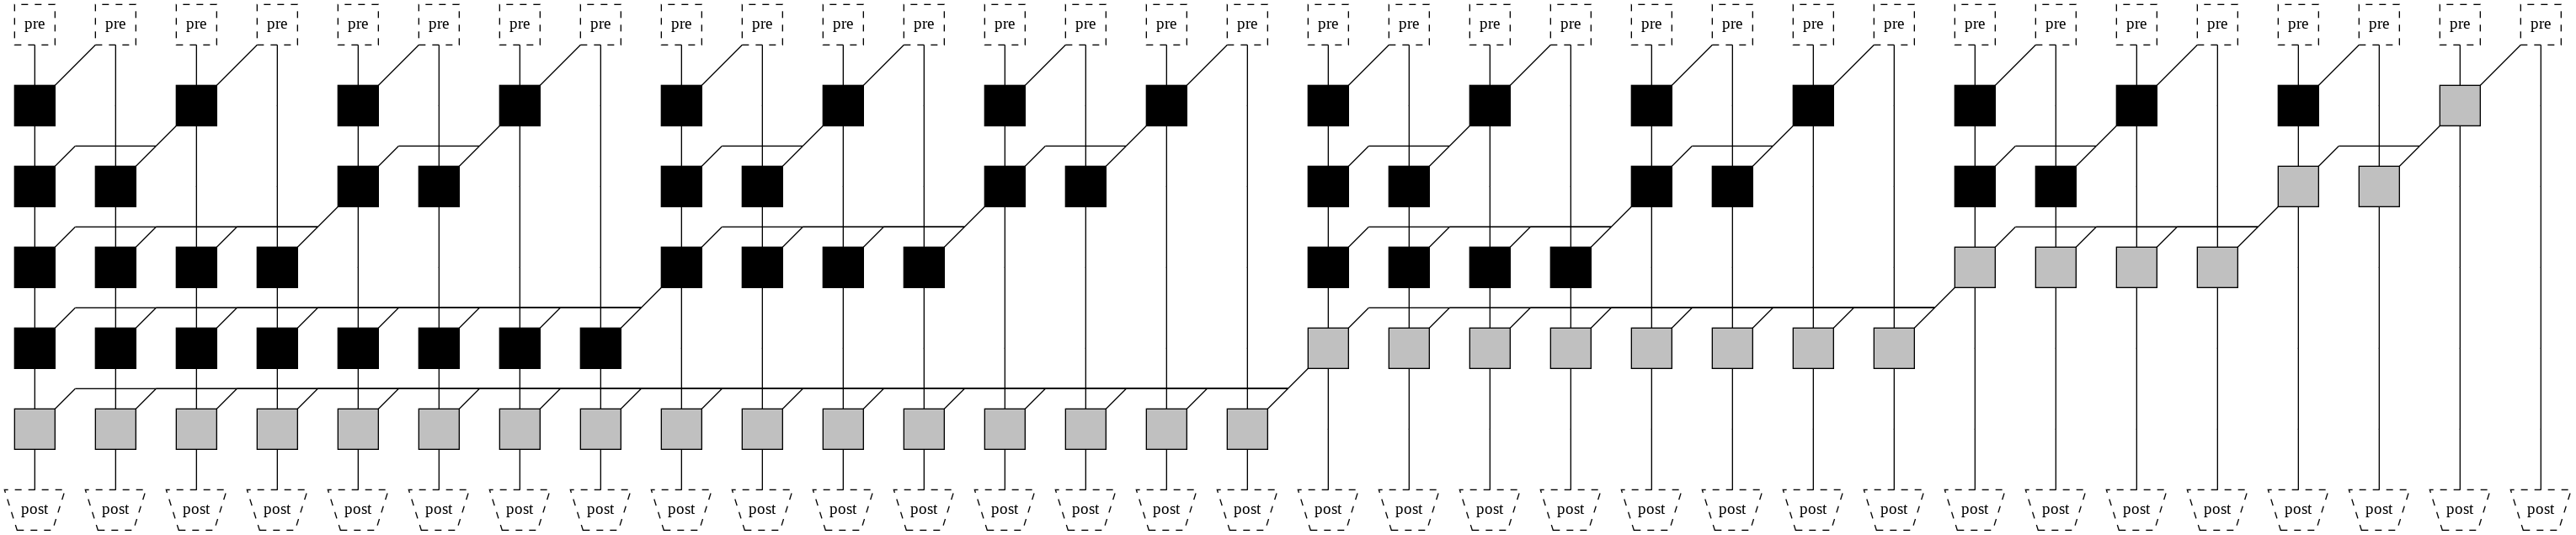

In [ ]:
# Import relevant module
from pptrees.adder_tree import adder_tree as tree

sk_adder = tree(32,"sklansky")

# Generate verilog, directly mapped to sky130_fd_sc_hd
sk_adder.hdl(out="sklansky.v",mapping="sky130_fd_sc_hd",top_module="sklansky")

sk_adder.png('sklansky.png')
from IPython.display import Image
Image(filename="sklansky.png")

## By request, an example of how to generate another classic structure!

This is a member of the Han-Carlson family of adders

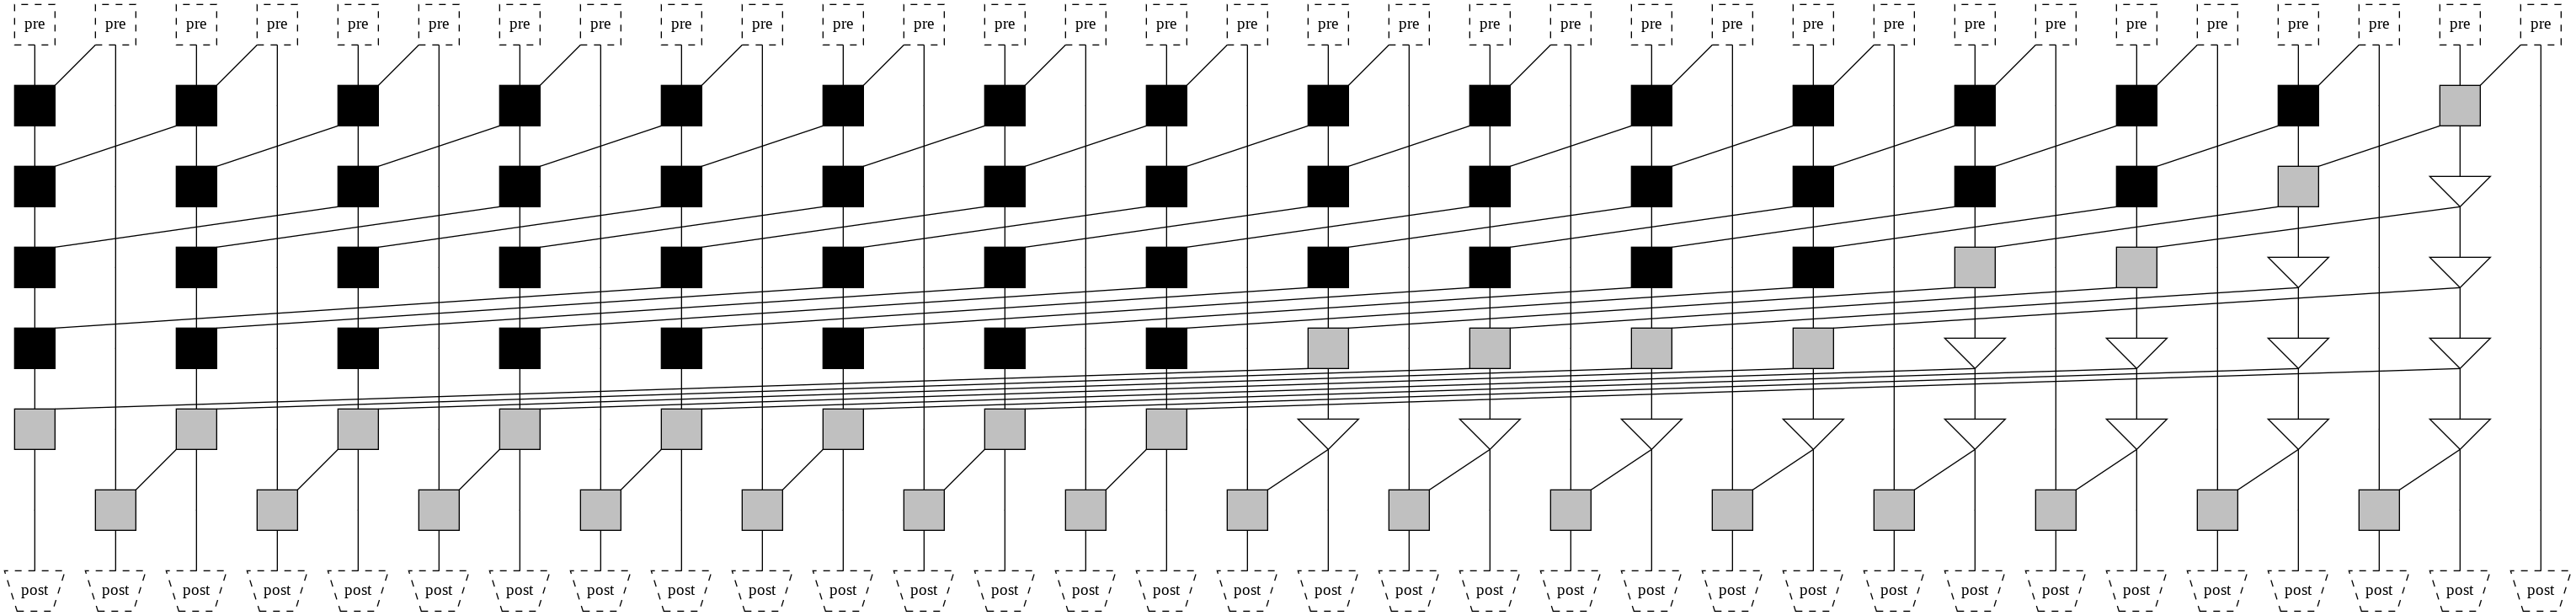

In [ ]:
# Import relevant module
from pptrees.adder_tree import adder_tree as tree

# Start with a Kogge-Stone base
hc_adder = tree(32,"kogge-stone")

# Apply regular series of transforms
for bit in range(16,32,2):
  hc_adder.FL(bit)
  TF_num=2
  if bit==16: TF_num=16
  if bit==18: TF_num=6
  if bit==20: TF_num=4
  for num in range(TF_num):
    hc_adder.TF(bit)

for bit in range(8,16,2):
  hc_adder.FL(bit)
  TF_num=4
  FL_num=1
  for num in range(TF_num):
    hc_adder.TF(bit)
  for num in range(FL_num):
    hc_adder.FL(bit)

for bit in range(4,8,2):
  hc_adder.FL(bit)
  TF_num=2
  FL_num=2
  for num in range(TF_num):
    hc_adder.TF(bit)
  for num in range(FL_num):
    hc_adder.FL(bit)

for bit in range(2,4,2):
  hc_adder.FL(bit)
  TF_num=1
  FL_num=3
  for num in range(TF_num):
    hc_adder.TF(bit)
  for num in range(FL_num):
    hc_adder.FL(bit)

# End up with an adder from the Han-Carlson family

# Generate verilog, directly mapped to sky130_fd_sc_hd
hc_adder.hdl(out="han_carlson.v",mapping="sky130_fd_sc_hd",top_module="han_carlson")

hc_adder.png('han_carlson.png')
from IPython.display import Image
Image(filename="han_carlson.png")


## Start with a classic adder structure, then add a twist!

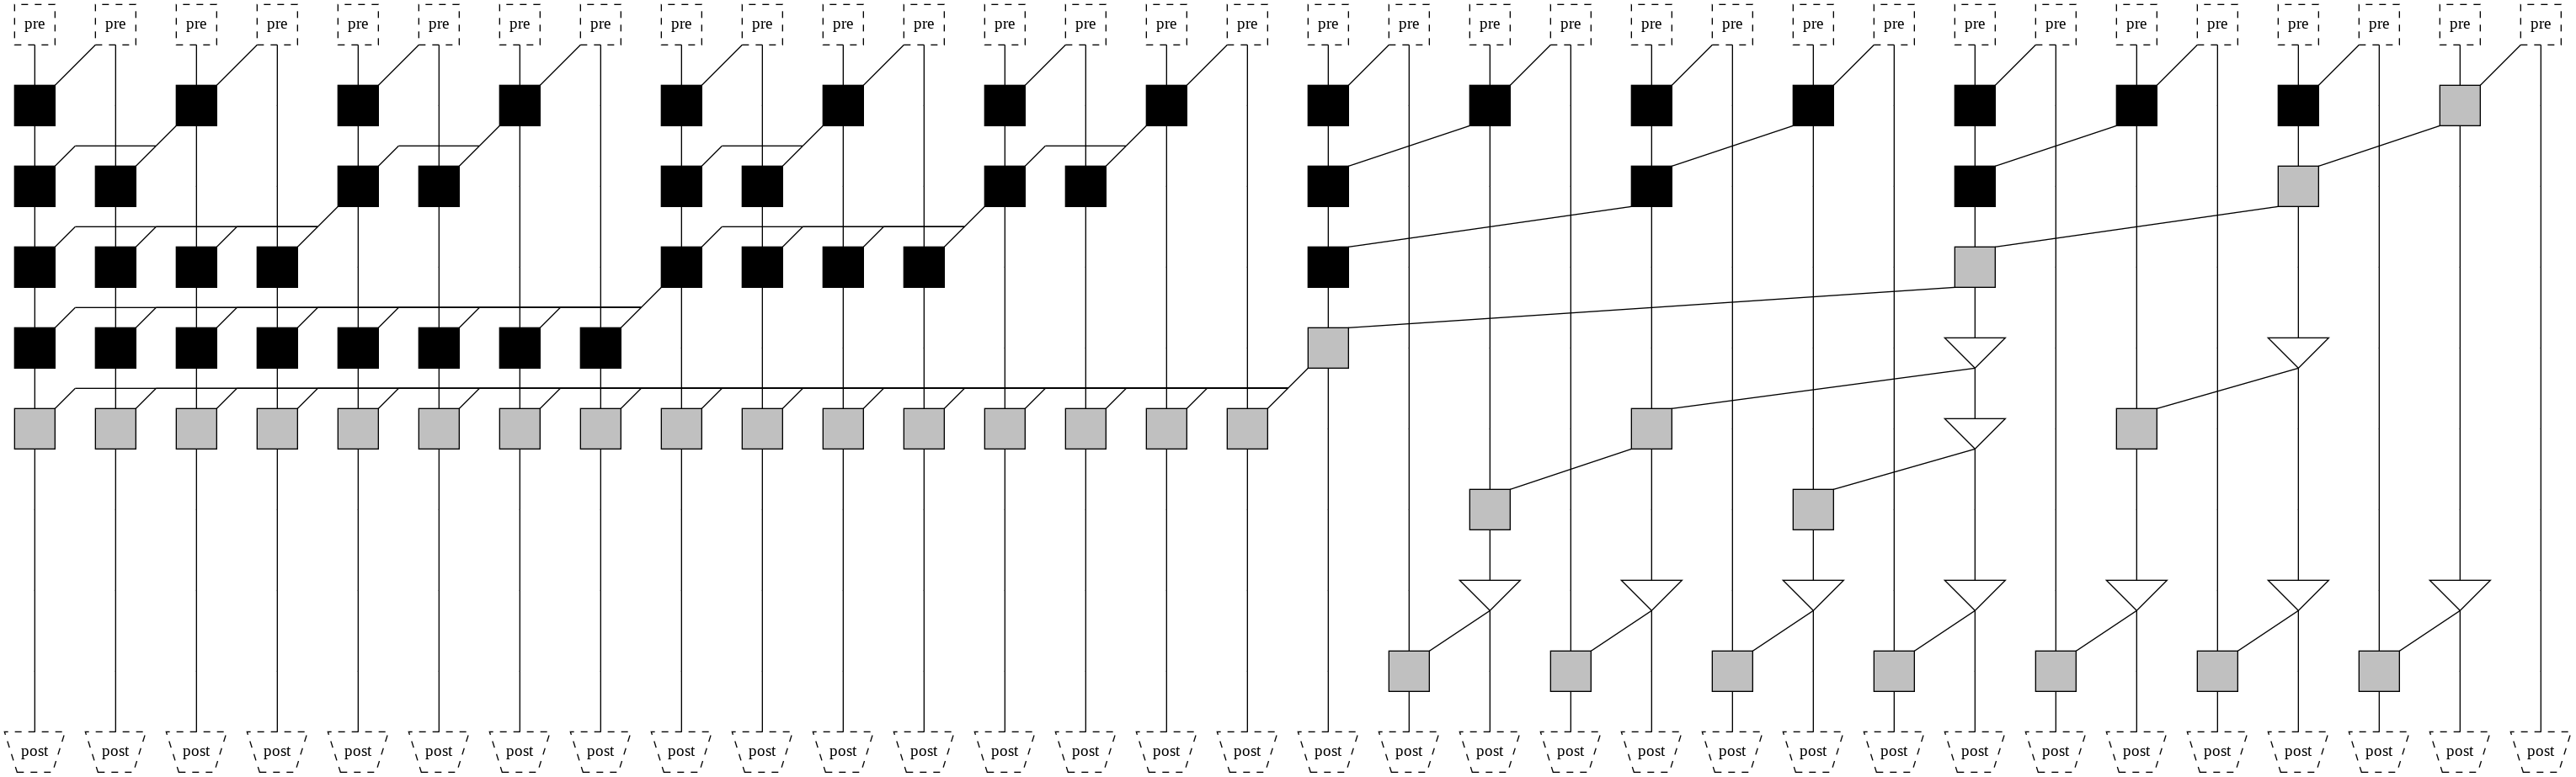

In [ ]:
# Import relevant module
from pptrees.adder_tree import adder_tree as tree

custom_adder = tree(32,"sklansky")

# Apply sequence of transforms
custom_adder.harris_step('FL',1,top_bit=16)
custom_adder.harris_step('FL',3,top_bit=16)
custom_adder.harris_step('FL',1,top_bit=8)
custom_adder.harris_step('FL',1,top_bit=4)

custom_adder.LF(5)
custom_adder.TF(6)
# Generate verilog, directly mapped to sky130_fd_sc_hd
custom_adder.hdl(out="custom.v",mapping="sky130_fd_sc_hd",top_module="custom")

custom_adder.png('custom.png')
from IPython.display import Image
Image(filename="custom.png")

# Implement adders through OpenLane

## Setup (RUN ME FIRST)

### Set various OpenLane environment variables

In [ ]:
import os
PATH=os.environ['PATH']
%env PDK_ROOT=/usr/local/share/pdk
%env OPENLANE_ROOT=/content/OpenLane
%env PATH={PATH}:/content/OpenLane:/content/OpenLane/scripts
%env TCLLIBPATH=/usr/share/tcltk
%env OPENLANE_LOCAL_INSTALL=1

env: PDK_ROOT=/usr/local/share/pdk
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts
env: TCLLIBPATH=/usr/share/tcltk
env: OPENLANE_LOCAL_INSTALL=1


### Clone a repository that allows for easy parsing of implementation results

In [ ]:
!git clone https://github.com/tdene/adder_networks.git
!pip install -r adder_networks/requirements.txt

Cloning into 'adder_networks'...
remote: Enumerating objects: 4268, done.
remote: Counting objects: 100% (4268/4268), done.
remote: Compressing objects: 100% (691/691), done.
remote: Total 4268 (delta 3561), reused 4104 (delta 3401), pack-reused 0
Receiving objects: 100% (4268/4268), 4.27 MiB | 10.54 MiB/s, done.
Resolving deltas: 100% (3561/3561), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 32.1 MB/s eta 0:00:00


## Run Sklansky adder through OpenLane

### Create OpenLane config file for our design

In [ ]:
%%writefile sklansky_config.tcl
# Basic flow switches to make the flow run smoothly (and fast)
set ::env(SYNTH_MAX_FANOUT) 4
set ::env(IO_PCT) 0
set ::env(DESIGN_IS_CORE) 0
## Disable some slow steps for the sake of runtime
set ::env(DIODE_INSERTION_STRATEGY) 0
set ::env(RUN_LVS) 0
set ::env(RUN_MAGIC_DRC) 0
set ::env(RUN_KLAYOUT_DRC) 0
## Our design has no clock
set ::env(CLOCK_TREE_SYNTH) 0
## Adder blocks have lots of pins, but they can sit on the lower metals
set ::env(FP_IO_HLAYER) {met1 met3}
set ::env(FP_IO_VLAYER) {li1 met2}

# These are the actual design-specific flow switches
## Set target clock
set ::env(CLOCK_PERIOD) 1.0
## Set floorplan area and density target
set ::env(CELL_PAD) 0
set ::env(PL_TARGET_DENSITY) 0.90
set ::env(FP_CORE_UTIL) 50
## Account for the fact that the Python library already mapped cells
set ::env(SYNTH_NO_FLAT) 0
set ::env(SYNTH_READ_BLACKBOX_LIB) 1
set ::env(DECAP_CELL) sky130_fd_sc_hd__fill_*

Overwriting sklansky_config.tcl


### Create our OpenLane design

In [ ]:
!rm -rf OpenLane/designs/sklansky
!flow.tcl -design sklansky -init_design_config -src "sklansky.v sky130_fd_sc_hd_map.v"
!cp sklansky_config.tcl OpenLane/designs/sklansky/sky130A_sky130_fd_sc_hd_config.tcl

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Creating design src directory /content/OpenLane/designs/sklansky/src
[INFO]: Populating /content/OpenLane/designs/sklansky/config.tcl..
[INFO]: Copying sklansky.v to sklansky.v
[INFO]: Copying sky130_fd_sc_hd_map.v to sky130_fd_sc_hd_map.v
[INFO]: Finished populating:
/content/OpenLane/designs/sklansky/config.tcl 
Please modify CLOCK_PORT, CLOCK_PERIOD and add your advanced settings to /content/OpenLane/designs/sklansky/config.tcl
[SUCCESS]: Done...


### Run OpenLane

In [ ]:
!flow.tcl -design sklansky -override_env RUN_CVC=0,QUIT_ON_MISMATCHES=0

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/sklansky/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/sklansky/config.tcl
[INFO]: PDKs root directory: /usr/local/share/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/share/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/sklansky/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/sklansky/runs/RUN_2022.04.21_08.00.30
[INFO]: Preparing LEF files for the nom corner...
[WARNING]: OpenLane may not function properly: Failed to compare PDKs.
Malformed .config/nodeinfo.json.
Traceback (most recent call last):
  File 

### Visualize the final layout

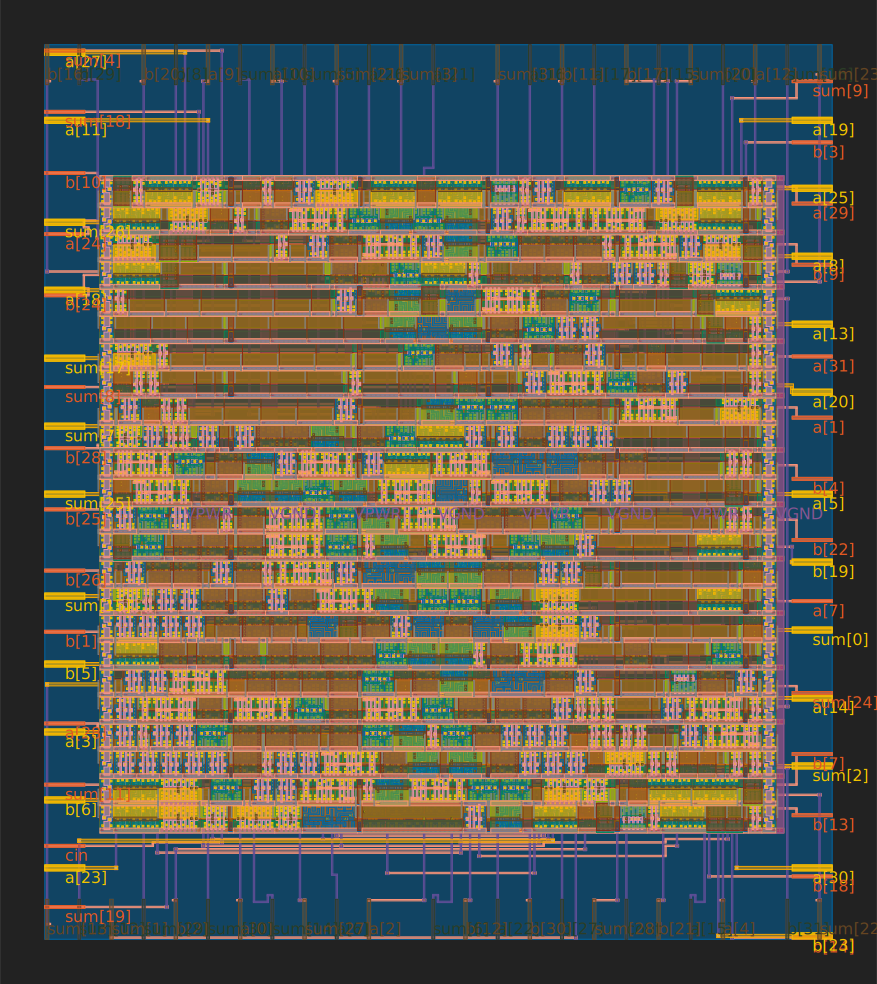

In [ ]:
import pathlib
import gdstk
from IPython.display import SVG

gdss = sorted(pathlib.Path('OpenLane/designs/sklansky/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[0])
top_cells = library.top_level()
top_cells[0].write_svg('sklansky.svg')
SVG('sklansky.svg')

### Copy OpenLane results to adder_networks repo, for easy parsing

In [ ]:
!mkdir -p adder_networks/adders
!mkdir -p adder_networks/adders/32bit
!mkdir -p adder_networks/adders/32bit/reports
!rm -rf adder_networks/adders/32bit/reports/sky130_fd_sc_hd/sklansky
!cp -r OpenLane/designs/sklansky/runs/*/reports/ adder_networks/adders/32bit/reports/sky130_fd_sc_hd/sklansky/

### View results

In [ ]:
!cd adder_networks && python3 scripts/parse.py --width 32 --names "sklansky" --target_density="40%"

Width (# of bits);Adder architecture;Target density;Std Cell count;Worst path delay;Maximum frequency;Area;Power;Energy;Achieved density;Worst path delay;Maximum frequency;Area;Power;Energy
32;Sklansky;40%;258;2.28 ns;439 MHz;3,373 µm²;2,190 µW;4,993 fJ;76%;1.90 ns;526 MHz;1,836 µm²;1,230 µW;2,337 fJ



## Run a Han-Carlson adder through OpenLane

### Create OpenLane config file for our design

In [ ]:
!echo "# OpenLane configs" > hc_config.tcl

# Basic flow switches to make the flow run smoothly (and fast)
!echo "set ::env(SYNTH_MAX_FANOUT) 4" >> hc_config.tcl
!echo "set ::env(IO_PCT) 0" >> hc_config.tcl
!echo "set ::env(DESIGN_IS_CORE) 0" >> hc_config.tcl
## Disable some slow steps for the sake of runtime
!echo "set ::env(RUN_LVS) 0" >> hc_config.tcl
!echo "set ::env(RUN_MAGIC_DRC) 0" >> hc_config.tcl
!echo "set ::env(RUN_KLAYOUT_DRC) 0" >> hc_config.tcl
## Our design has no clock
!echo "set ::env(CLOCK_TREE_SYNTH) 0" >> hc_config.tcl

# The following switches are related to OpenLane issue #1037
!echo "set ::env(FP_PDN_AUTO_ADJUST) 0" >> hc_config.tcl
!echo "set ::env(FP_PDN_VPITCH) 26.07" >> hc_config.tcl
!echo "set ::env(FP_PDN_VOFFSET) 52.14" >> hc_config.tcl

# These are the actual design-specific flow switches
## Set target clock
!echo "set ::env(CLOCK_PERIOD) 10.0" >> hc_config.tcl
## Set floorplan area and density target
!echo "set ::env(PL_TARGET_DENSITY) 0.85" >> hc_config.tcl
!echo "set ::env(FP_CORE_UTIL) 30" >> hc_config.tcl
## Account for the fact that the Python library already mapped cells
!echo "set ::env(SYNTH_NO_FLAT) 0" >> hc_config.tcl
!echo "set ::env(SYNTH_READ_BLACKBOX_LIB) 1" >> hc_config.tcl
!echo "set ::env(DECAP_CELL) sky130_fd_sc_hd__fill_*" >> hc_config.tcl

### Create our OpenLane design

In [ ]:
!rm -rf OpenLane/designs/han_carlson
!flow.tcl -design han_carlson -init_design_config -src "han_carlson.v sky130_fd_sc_hd_map.v"
!cp hc_config.tcl OpenLane/designs/han_carlson/sky130A_sky130_fd_sc_hd_config.tcl

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Creating design src directory /content/OpenLane/designs/han_carlson/src
[INFO]: Populating /content/OpenLane/designs/han_carlson/config.tcl..
[INFO]: Copying han_carlson.v to han_carlson.v
[INFO]: Copying sky130_fd_sc_hd_map.v to sky130_fd_sc_hd_map.v
[INFO]: Finished populating:
/content/OpenLane/designs/han_carlson/config.tcl 
Please modify CLOCK_PORT, CLOCK_PERIOD and add your advanced settings to /content/OpenLane/designs/han_carlson/config.tcl
[SUCCESS]: Done...


### Run OpenLane

In [ ]:
!flow.tcl -design han_carlson -override_env RUN_CVC=0,QUIT_ON_MISMATCHES=0

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/han_carlson/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/han_carlson/config.tcl
[INFO]: PDKs root directory: /usr/local/share/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/share/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/han_carlson/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/han_carlson/runs/RUN_2022.04.13_08.11.56
[INFO]: Preparing LEF files for the nom corner...
[WARNING]: OpenLane may not function properly: Failed to compare PDKs.
Malformed .config/nodeinfo.json.
Traceback (most recent call la

### Visualize the final layout

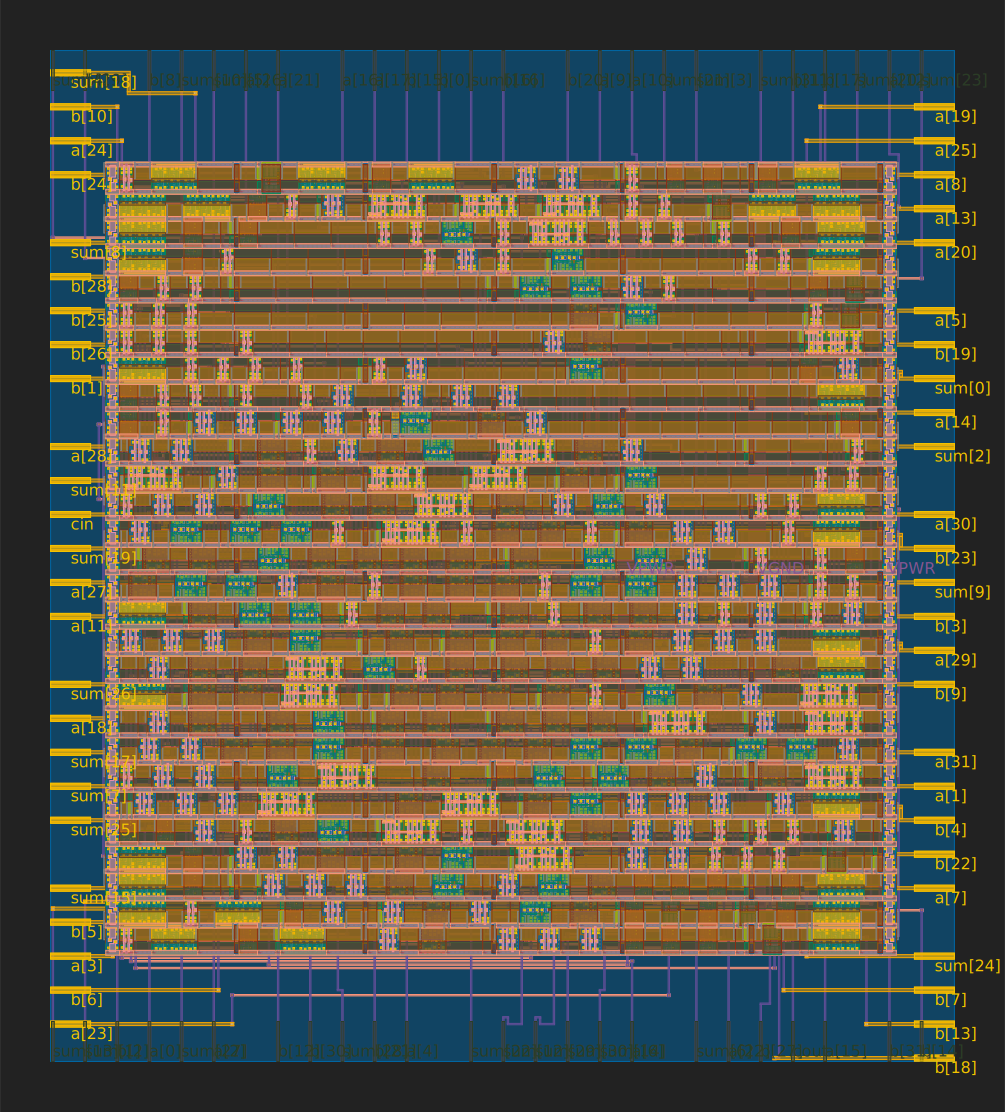

In [ ]:
import pathlib
import gdstk
from IPython.display import SVG

gdss = sorted(pathlib.Path('OpenLane/designs/han_carlson/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[0])
top_cells = library.top_level()
top_cells[0].write_svg('han_carlson.svg')
SVG('han_carlson.svg')

### Copy OpenLane results to adder_networks repo, for easy parsing

In [ ]:
!mkdir -p adder_networks/adders
!mkdir -p adder_networks/adders/32bit
!mkdir -p adder_networks/adders/32bit/reports
!rm -rf adder_networks/adders/32bit/reports/sky130_fd_sc_hd/han_carlson
!cp -r OpenLane/designs/han_carlson/runs/*/reports/ adder_networks/adders/32bit/reports/sky130_fd_sc_hd/han_carlson/

### View results

In [ ]:
!cd adder_networks && python3 scripts/parse.py --width 32 --names "han_carlson" --target_density="30%"

Width (# of bits),Adder architecture,Target density,Std Cell count,Worst path delay,Maximum frequency,Area,Power,Energy,Achieved density,Worst path delay,Maximum frequency,Area,Power,Energy
32,Han_Carlson,30%,273,5.09 ns,196 MHz,3,043 µm²,208 µW,1,059 fJ,49%,1.61 ns,621 MHz,1,892 µm²,126 µW,203 fJ



## Run custom adder through OpenLane

### Create OpenLane config file for our design

In [ ]:
!echo "# OpenLane configs" > custom_config.tcl

# Basic flow switches to make the flow run smoothly (and fast)
!echo "set ::env(SYNTH_MAX_FANOUT) 4" >> custom_config.tcl
!echo "set ::env(IO_PCT) 0" >> custom_config.tcl
!echo "set ::env(DESIGN_IS_CORE) 0" >> custom_config.tcl
## Disable some slow steps for the sake of runtime
!echo "set ::env(RUN_LVS) 0" >> custom_config.tcl
!echo "set ::env(RUN_MAGIC_DRC) 0" >> custom_config.tcl
!echo "set ::env(RUN_KLAYOUT_DRC) 0" >> custom_config.tcl
## Our design has no clock
!echo "set ::env(CLOCK_TREE_SYNTH) 0" >> custom_config.tcl

# The following switches are related to OpenLane issue #1037
!echo "set ::env(FP_PDN_AUTO_ADJUST) 0" >> custom_config.tcl
!echo "set ::env(FP_PDN_VPITCH) 26.07" >> custom_config.tcl
!echo "set ::env(FP_PDN_VOFFSET) 52.14" >> custom_config.tcl

# These are the actual design-specific flow switches
## Set target clock
!echo "set ::env(CLOCK_PERIOD) 10.0" >> custom_config.tcl
## Set floorplan area and density target
!echo "set ::env(PL_TARGET_DENSITY) 0.85" >> custom_config.tcl
!echo "set ::env(FP_CORE_UTIL) 30" >> custom_config.tcl
## Account for the fact that the Python library already mapped cells
!echo "set ::env(SYNTH_NO_FLAT) 0" >> custom_config.tcl
!echo "set ::env(SYNTH_READ_BLACKBOX_LIB) 1" >> custom_config.tcl
!echo "set ::env(DECAP_CELL) sky130_fd_sc_hd__fill_*" >> custom_config.tcl

### Create our OpenLane design

In [ ]:
!rm -rf OpenLane/designs/custom
!flow.tcl -design custom -init_design_config -src "custom.v sky130_fd_sc_hd_map.v"
!cp custom_config.tcl OpenLane/designs/custom/sky130A_sky130_fd_sc_hd_config.tcl

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Creating design src directory /content/OpenLane/designs/custom/src
[INFO]: Populating /content/OpenLane/designs/custom/config.tcl..
[INFO]: Copying custom.v to custom.v
[INFO]: Copying sky130_fd_sc_hd_map.v to sky130_fd_sc_hd_map.v
[INFO]: Finished populating:
/content/OpenLane/designs/custom/config.tcl 
Please modify CLOCK_PORT, CLOCK_PERIOD and add your advanced settings to /content/OpenLane/designs/custom/config.tcl
[SUCCESS]: Done...


### Run OpenLane

In [ ]:
!flow.tcl -design custom -override_env RUN_CVC=0,QUIT_ON_MISMATCHES=0

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/custom/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/custom/config.tcl
[INFO]: PDKs root directory: /usr/local/share/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/share/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/custom/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/custom/runs/RUN_2022.04.13_08.13.23
[INFO]: Preparing LEF files for the nom corner...
[WARNING]: OpenLane may not function properly: Failed to compare PDKs.
Malformed .config/nodeinfo.json.
Traceback (most recent call last):
  File "/conten

### Visualize the final layout

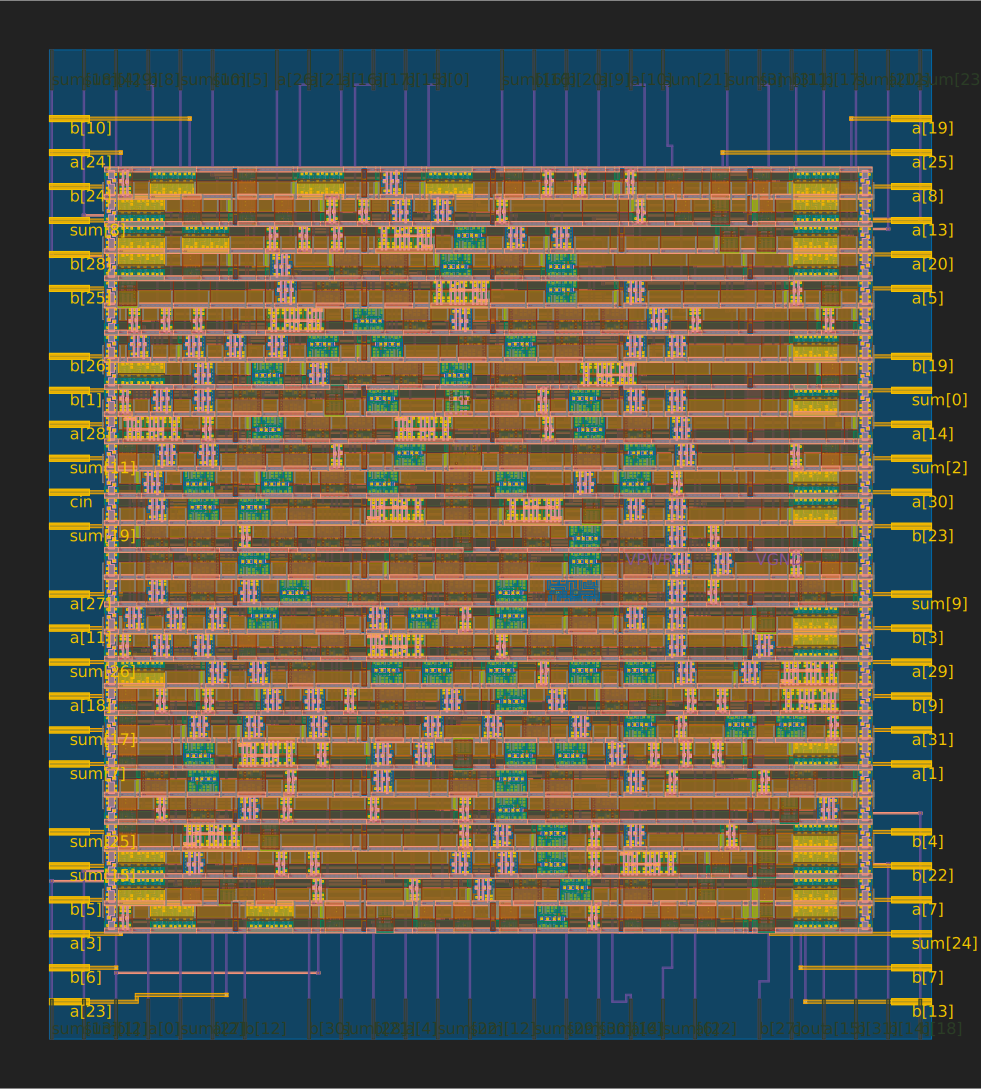

In [ ]:
import pathlib
import gdstk
from IPython.display import SVG

gdss = sorted(pathlib.Path('OpenLane/designs/custom/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[0])
top_cells = library.top_level()
top_cells[0].write_svg('custom.svg')
SVG('custom.svg')

### Copy OpenLane results to adder_networks repo, for easy parsing

In [ ]:
!mkdir -p adder_networks/adders
!mkdir -p adder_networks/adders/32bit
!mkdir -p adder_networks/adders/32bit/reports
!rm -rf adder_networks/adders/32bit/reports/sky130_fd_sc_hd/custom
!cp -r OpenLane/designs/custom/runs/*/reports/ adder_networks/adders/32bit/reports/sky130_fd_sc_hd/custom/

### View results (side-by-side with Sklansky!)

In [ ]:
!cd adder_networks && python3 scripts/parse.py --width 32 --names "custom" "sklansky" "han_carlson" --target_density="30%"

Width (# of bits),Adder architecture,Target density,Std Cell count,Worst path delay,Maximum frequency,Area,Power,Energy,Achieved density,Worst path delay,Maximum frequency,Area,Power,Energy
32,Custom,30%,256,4.59 ns,218 MHz,2,848 µm²,185 µW,849 fJ,49%,1.76 ns,568 MHz,1,790 µm²,122 µW,215 fJ
32,Sklansky,30%,258,4.46 ns,224 MHz,2,964 µm²,192 µW,856 fJ,50%,1.90 ns,526 MHz,1,836 µm²,123 µW,234 fJ
32,Han_Carlson,30%,273,5.09 ns,196 MHz,3,043 µm²,208 µW,1,059 fJ,49%,1.61 ns,621 MHz,1,892 µm²,126 µW,203 fJ



# Scratch-work area (run "Setup (RUN ME FIRST)" first!)

## Play around with adder generation

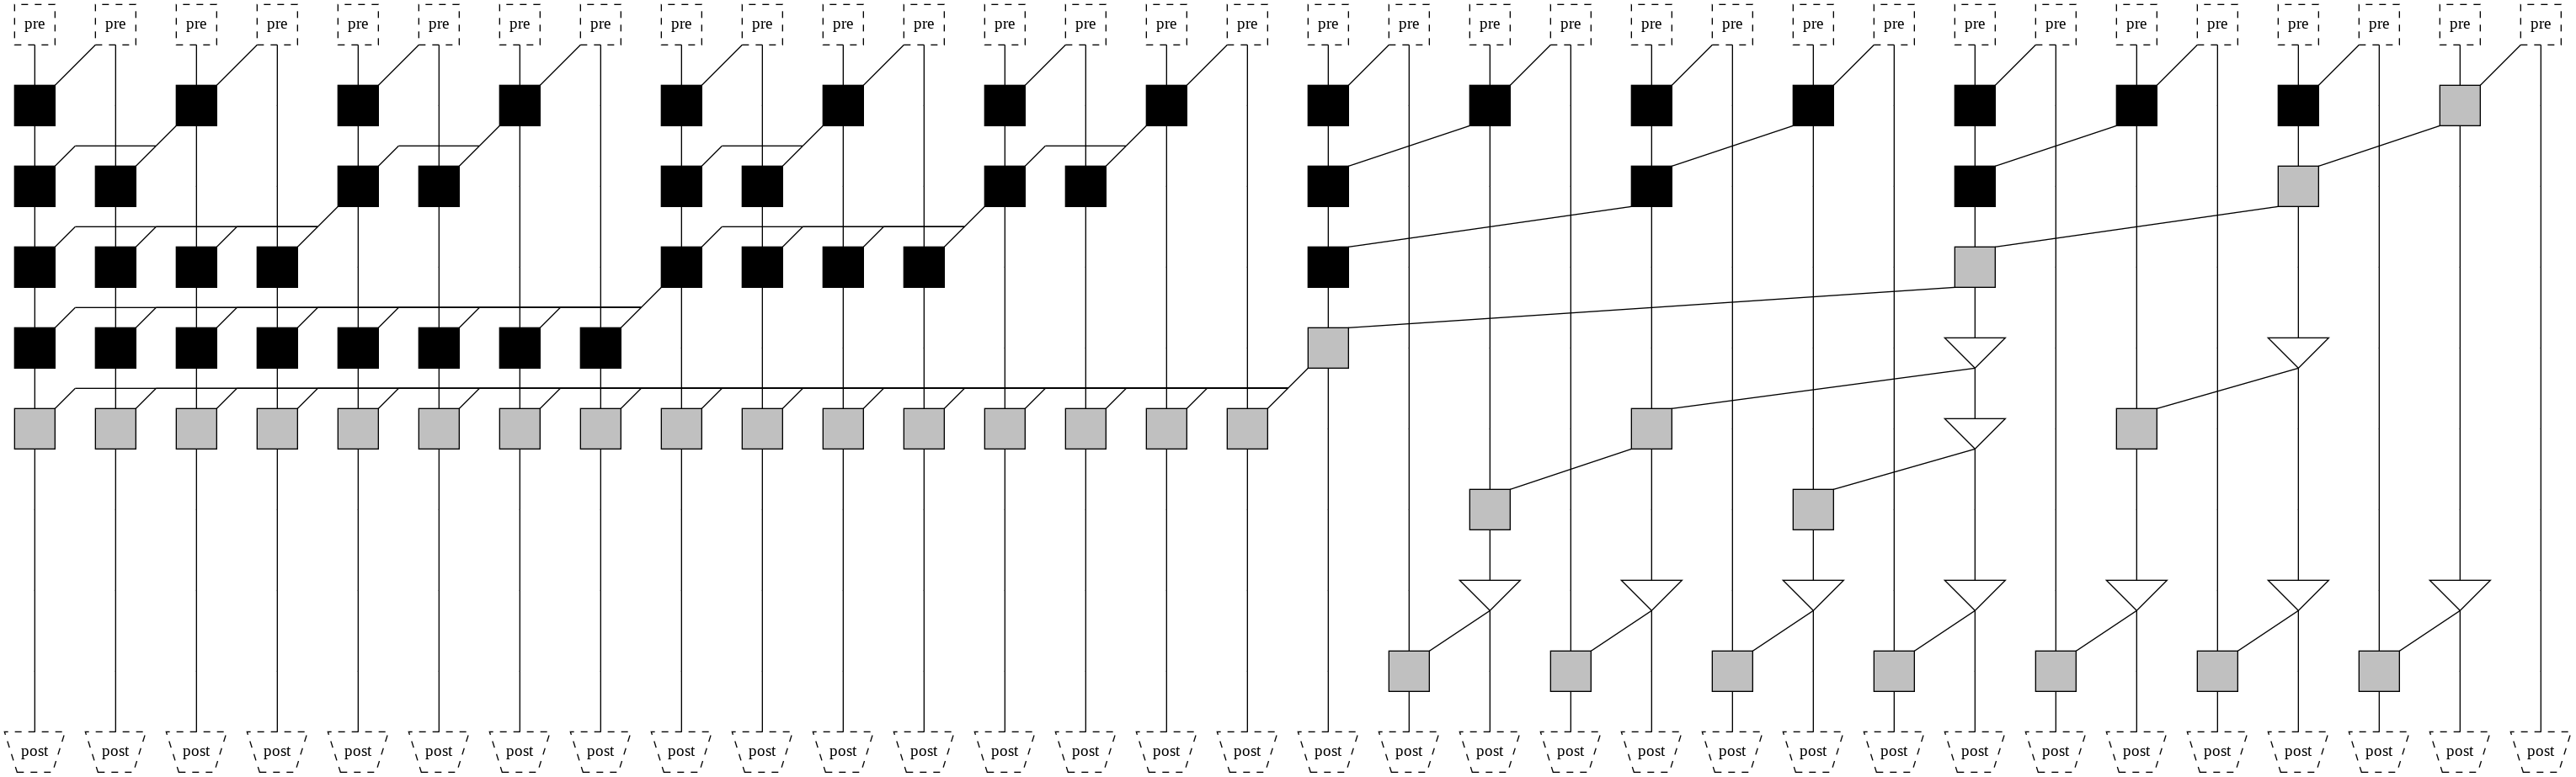

In [ ]:
# Import relevant module
from pptrees.adder_tree import adder_tree as tree

scratch_adder = tree(8,"sklansky")

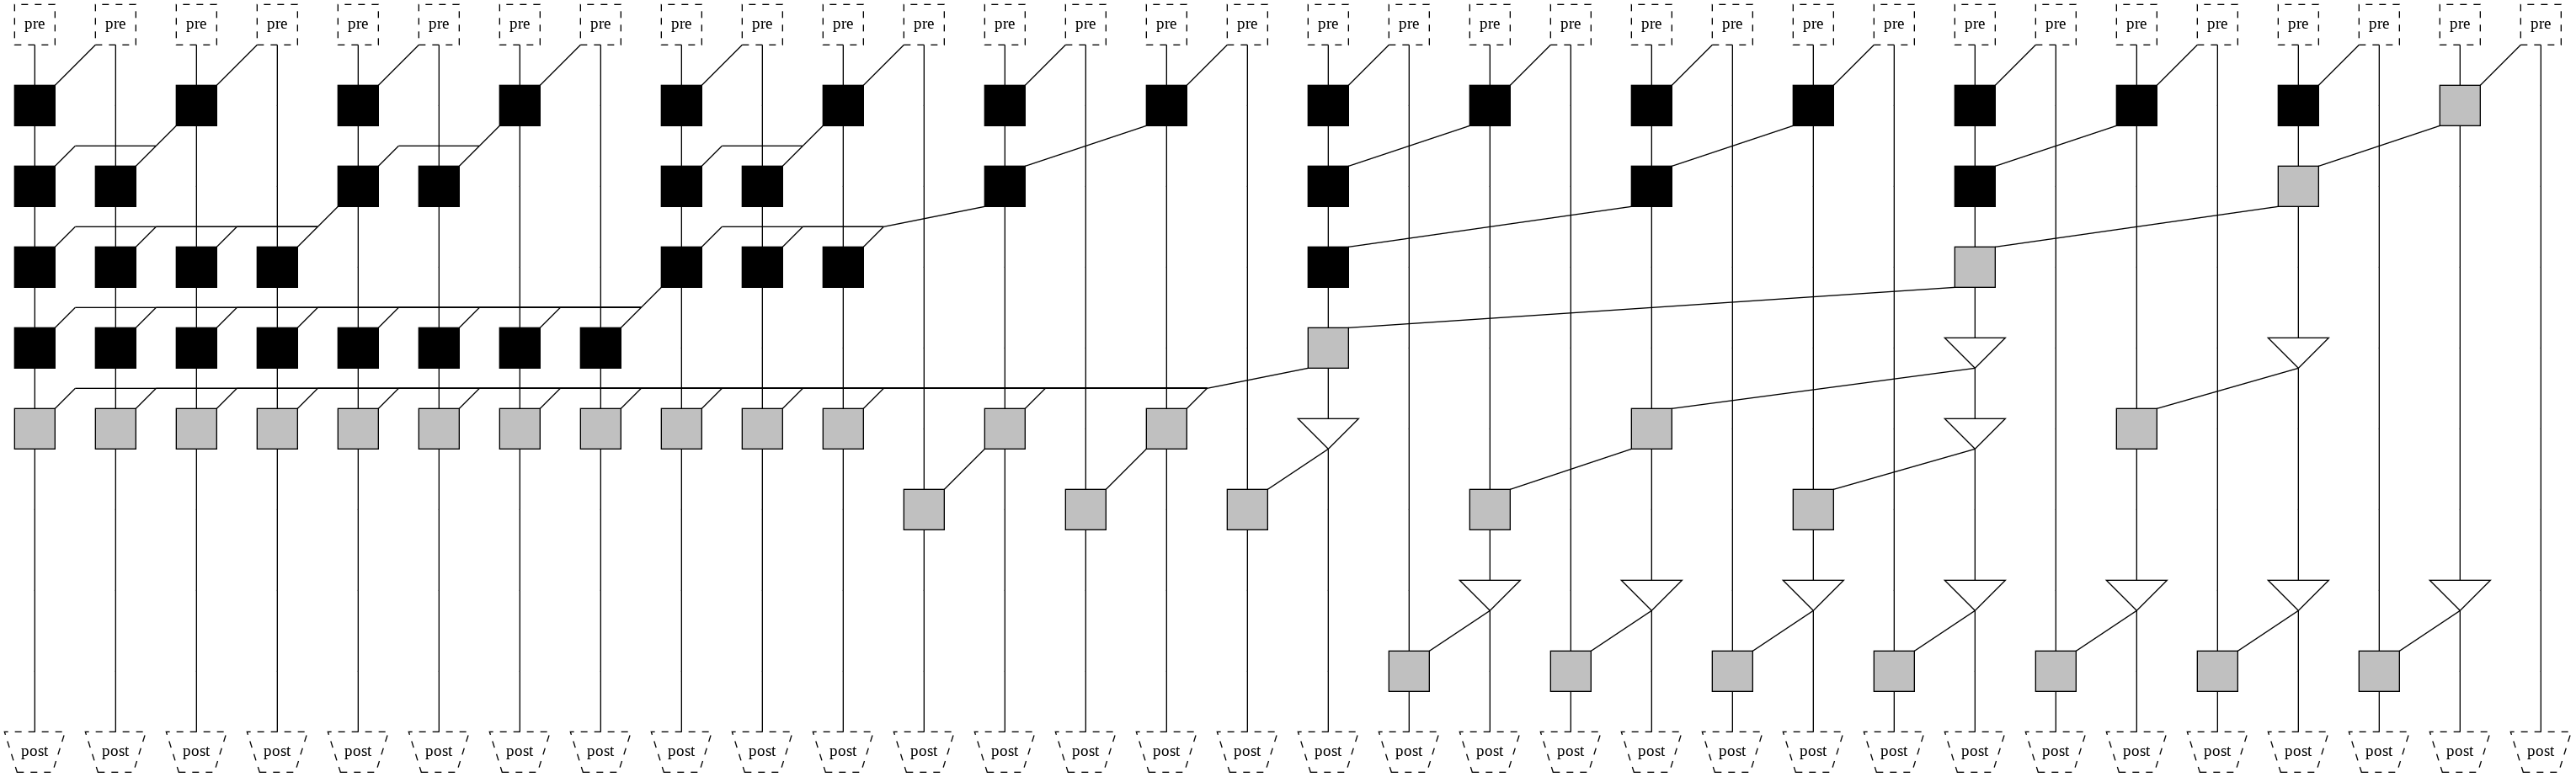

In [ ]:
scratch_adder.FL(16)

scratch_adder.FL(18)

scratch_adder.FL(20)

scratch_adder.png('scratch.png')
from IPython.display import Image
Image(filename="scratch.png")

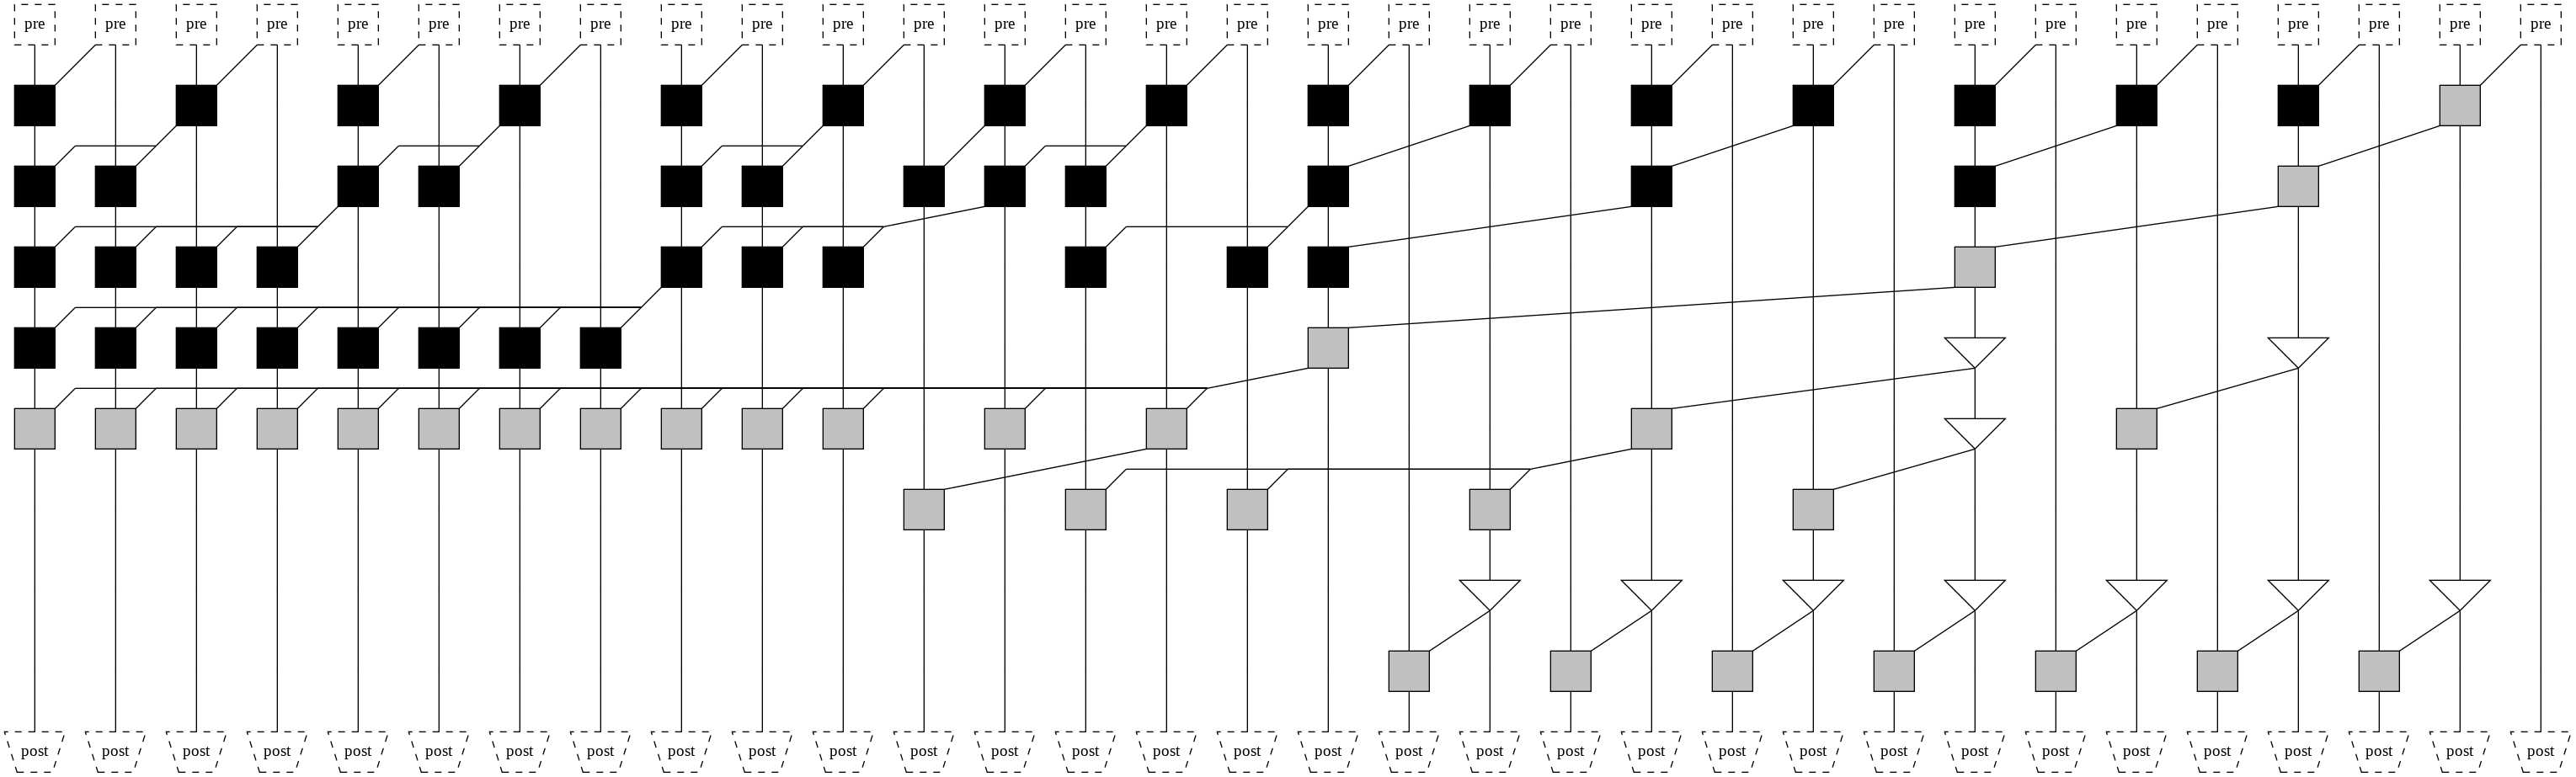

In [ ]:
scratch_adder.FT(16)

scratch_adder.FT(18)

scratch_adder.FT(20)

scratch_adder.png('scratch.png')
from IPython.display import Image
Image(filename="scratch.png")

In [ ]:
# Generate verilog, directly mapped to sky130_fd_sc_hd
scratch_adder.hdl(out="scratch_adder.v",mapping="sky130_fd_sc_hd",top_module="scratch_adder")

## Set up OpenLane environment

In [ ]:
import os
PATH=os.environ['PATH']
%env PDK_ROOT=/usr/local/share/pdk
%env OPENLANE_ROOT=/content/OpenLane
%env PATH={PATH}:/content/OpenLane:/content/OpenLane/scripts
%env TCLLIBPATH=/usr/share/tcltk
%env OPENLANE_LOCAL_INSTALL=1

!echo "# OpenLane configs" > scratch_config.tcl

# Basic flow switches to make the flow run smoothly (and fast)
!echo "set ::env(SYNTH_MAX_FANOUT) 4" >> scratch_config.tcl
!echo "set ::env(IO_PCT) 0" >> scratch_config.tcl
!echo "set ::env(DESIGN_IS_CORE) 0" >> scratch_config.tcl
## Disable some slow steps for the sake of runtime
!echo "set ::env(RUN_LVS) 0" >> scratch_config.tcl
!echo "set ::env(RUN_MAGIC_DRC) 0" >> scratch_config.tcl
!echo "set ::env(RUN_KLAYOUT_DRC) 0" >> scratch_config.tcl
## Our design has no clock
!echo "set ::env(CLOCK_TREE_SYNTH) 0" >> scratch_config.tcl

# The following switches are related to OpenLane issue #1037
!echo "set ::env(FP_PDN_AUTO_ADJUST) 0" >> scratch_config.tcl
!echo "set ::env(FP_PDN_VPITCH) 26.07" >> scratch_config.tcl
!echo "set ::env(FP_PDN_VOFFSET) 52.14" >> scratch_config.tcl

# These are the actual design-specific flow switches
## Set target clock
!echo "set ::env(CLOCK_PERIOD) 10.0" >> scratch_config.tcl
## Set floorplan area and density target
!echo "set ::env(PL_TARGET_DENSITY) 0.85" >> scratch_config.tcl
!echo "set ::env(FP_CORE_UTIL) 30" >> scratch_config.tcl
## Account for the fact that the Python library already mapped cells
!echo "set ::env(SYNTH_NO_FLAT) 0" >> scratch_config.tcl
!echo "set ::env(SYNTH_READ_BLACKBOX_LIB) 1" >> scratch_config.tcl
!echo "set ::env(DECAP_CELL) sky130_fd_sc_hd__fill_*" >> scratch_config.tcl

env: PDK_ROOT=/usr/local/share/pdk
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts
env: TCLLIBPATH=/usr/share/tcltk
env: OPENLANE_LOCAL_INSTALL=1


## Create OpenLane design

In [ ]:
!rm -rf OpenLane/designs/scratch_adder
!flow.tcl -design scratch_adder -init_design_config -src "scratch_adder.v sky130_fd_sc_hd_map.v"
!cp scratch_config.tcl OpenLane/designs/scratch_adder/sky130A_sky130_fd_sc_hd_config.tcl

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Creating design src directory /content/OpenLane/designs/scratch_adder/src
[INFO]: Populating /content/OpenLane/designs/scratch_adder/config.tcl..
[INFO]: Copying scratch_adder.v to scratch_adder.v
[INFO]: Copying sky130_fd_sc_hd_map.v to sky130_fd_sc_hd_map.v
[INFO]: Finished populating:
/content/OpenLane/designs/scratch_adder/config.tcl 
Please modify CLOCK_PORT, CLOCK_PERIOD and add your advanced settings to /content/OpenLane/designs/scratch_adder/config.tcl
[SUCCESS]: Done...


## Run OpenLane

In [ ]:
!flow.tcl -design scratch_adder -override_env RUN_CVC=0,QUIT_ON_MISMATCHES=0

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/scratch_adder/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/scratch_adder/config.tcl
[INFO]: PDKs root directory: /usr/local/share/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/share/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/scratch_adder/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/scratch_adder/runs/RUN_2022.04.13_08.27.37
[INFO]: Preparing LEF files for the nom corner...
[WARNING]: OpenLane may not function properly: Failed to compare PDKs.
Malformed .config/nodeinfo.json.
Traceback (most recent

## Visualize the final layout

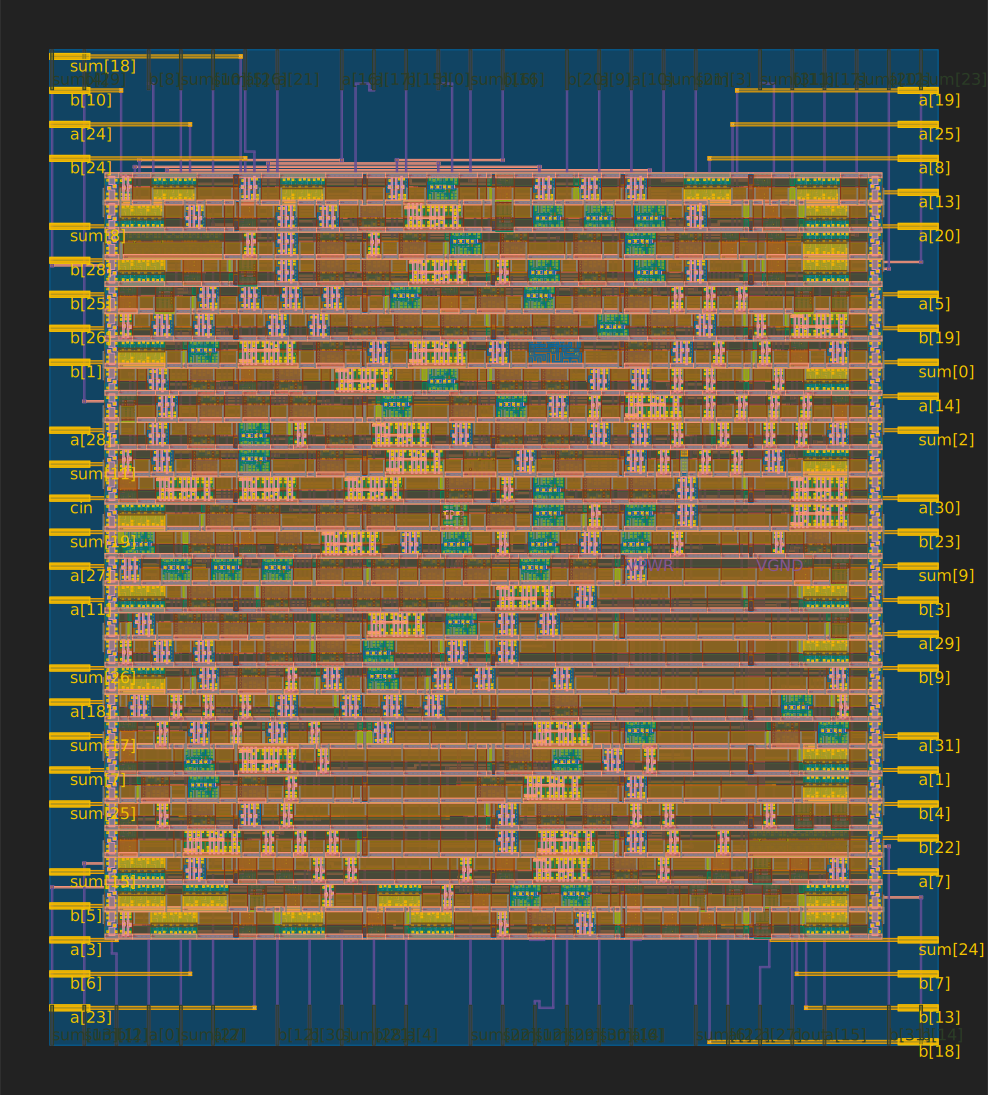

In [ ]:
import pathlib
import gdstk
from IPython.display import SVG

gdss = sorted(pathlib.Path('OpenLane/designs/scratch_adder/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[0])
top_cells = library.top_level()
top_cells[0].write_svg('scratch.svg')
SVG('scratch.svg')

## Copy OpenLane results to adder_networks repo, for easy parsing

In [ ]:
!mkdir -p adder_networks/adders
!mkdir -p adder_networks/adders/32bit
!mkdir -p adder_networks/adders/32bit/reports
!rm -rf adder_networks/adders/32bit/reports/sky130_fd_sc_hd/scratch
!cp -r OpenLane/designs/scratch_adder/runs/*/reports/ adder_networks/adders/32bit/reports/sky130_fd_sc_hd/scratch/

## View results side-by-side

In [ ]:
!cd adder_networks && python3 scripts/parse.py --width 32 --names "custom" "scratch" --target_density="30%"

Width (# of bits),Adder architecture,Target density,Std Cell count,Worst path delay,Maximum frequency,Area,Power,Energy,Achieved density,Worst path delay,Maximum frequency,Area,Power,Energy
32,Custom,30%,256,4.59 ns,218 MHz,2,848 µm²,185 µW,849 fJ,49%,1.76 ns,568 MHz,1,790 µm²,122 µW,215 fJ
32,Scratch,30%,260,4.82 ns,207 MHz,2,979 µm²,198 µW,954 fJ,50%,1.80 ns,556 MHz,1,818 µm²,123 µW,221 fJ

